# This code demonstrates a Hidden markov modeling of conformational transitions betweeen markovian states

# load required packages

In [1]:
using Statistics, Plots
using Revise; using MDToolbox

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/seica/.julia/packages/Revise/BqeJF/src/Revise.jl:1328
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


In [2]:
using BSON: @load
#@load "data/t1r/t1r.bson" C T pi_i p_all indexOfCluster tau pdb psf
@load "data/t1r/t1r.bson" T pi_i p_all

In [3]:
nstate = size(T, 1)

50

# generate training data

In [4]:
state = msmgenerate(1000, T, pi_i)

1000-element Array{Int64,1}:
 12
 45
 30
 30
 46
 45
 41
 46
 47
 14
 33
 46
 45
  ⋮
 48
 48
 19
  4
  4
 24
 20
  4
  4
 18
 49
  8

# calculate emissions

In [5]:
nframe = length(state)
emission = zeros(Float64, nstate, nframe)
emission .= 0.01
for iframe = 1:nframe
    emission[state[iframe], iframe] = 1.0
end
emission .= emission ./ sum(emission, dims=1)

50×1000 Array{Float64,2}:
 0.00671141  0.00671141  0.00671141  …  0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141  …  0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141  …  0.00671141  0.00671141  0.00671141
 0.671141    0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 

In [6]:
observation = collect(1:nframe)

1000-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
 1000

# Hidden markov modeling

In [7]:
# initial transition probabilities
T0 = rand(Float64, nstate, nstate)
T0 .= T0 ./ sum(T0, dims=2)

50×50 Array{Float64,2}:
 0.00553472  0.0224945    0.0155727   …  0.0103572   0.0291647    0.0217522
 0.0200821   0.0286507    0.00638079     0.0264289   0.00366218   0.0184599
 0.0173649   0.00666157   0.0231447      0.0306538   0.00137518   0.00791491
 0.021343    0.00560818   0.00716307     0.001549    0.0284862    0.0252016
 0.0120449   0.0451454    0.0307226      0.00460286  0.012963     0.0111646
 0.0213923   0.0109919    0.0149318   …  0.0235568   0.0136155    0.0277392
 0.033617    0.0242726    0.00873421     0.0364817   0.0149065    0.0381269
 0.0339488   0.0331502    0.0180343      0.0342367   0.00497008   0.0166442
 0.0060259   0.00166192   0.0138616      0.0389686   0.0304265    0.00557947
 0.0285582   0.00455572   0.0277884      0.0052223   0.0365578    0.0218728
 0.0191192   0.00689329   0.00223984  …  0.00134995  0.0125465    0.00871007
 0.00865516  0.0231738    0.0106721      0.0247817   0.0197919    0.0315799
 0.0189268   0.0237149    0.011822       0.0150739   0.025542

In [8]:
@time T1, pi_i1, emission1 = msmbaumwelch([observation], T0, pi_i, emission);

  5.919106 seconds (9.79 M allocations: 6.275 GiB, 12.03% gc time)


# visualization

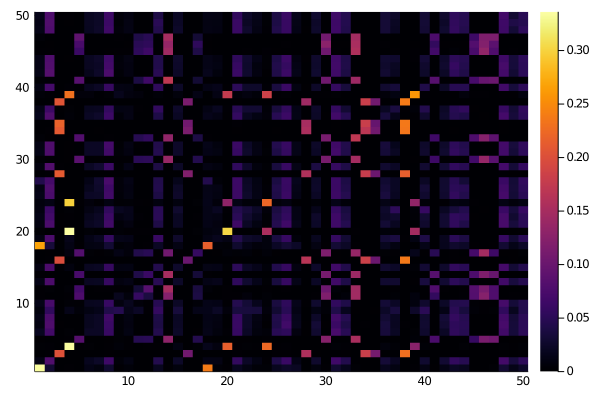

In [9]:
heatmap(T)

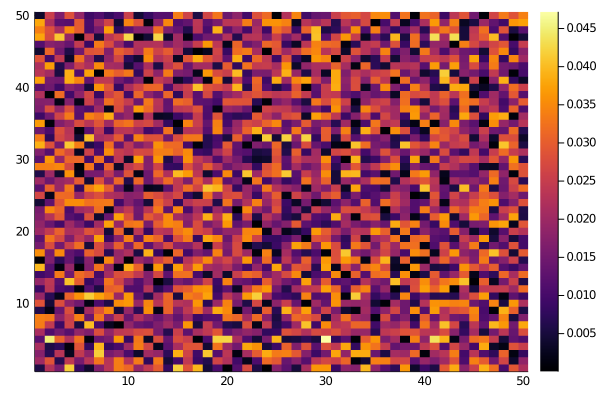

In [10]:
heatmap(T0)

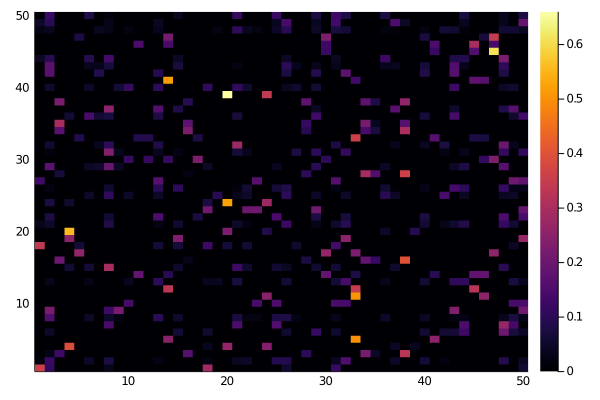

In [11]:
heatmap(T1)

# visualization 2

In [12]:
using GraphRecipes, Plots
pyplot()

Plots.PyPlotBackend()

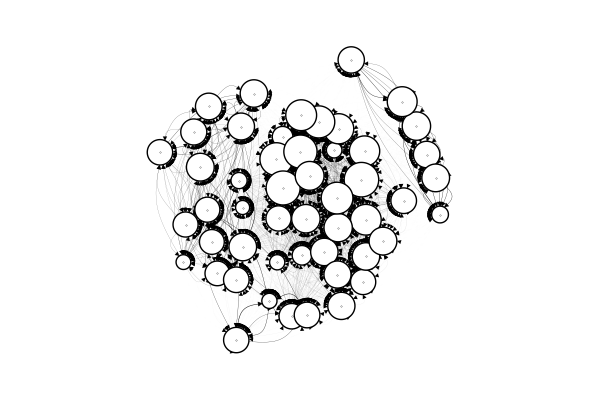

In [13]:
graphplot(T,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T, 
          self_edge_size = 0.0, 
          arrow = true
          )

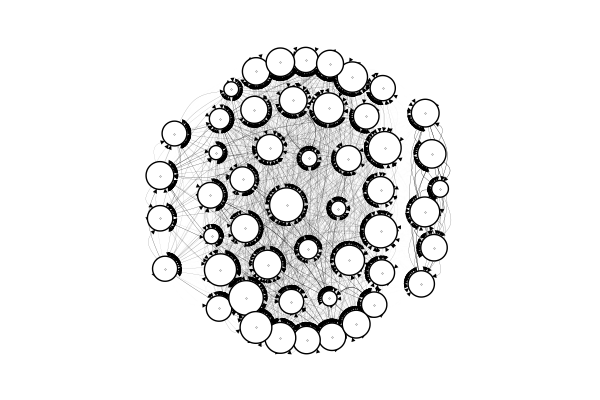

In [14]:
graphplot(T1,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T, 
          self_edge_size = 0.0, 
          arrow = true
          )

# Viterbi algorithm

In [15]:
@time state_estimated = msmviterbi(observation, T1, pi_i1, emission1);

  0.797953 seconds (2.45 M allocations: 121.801 MiB)


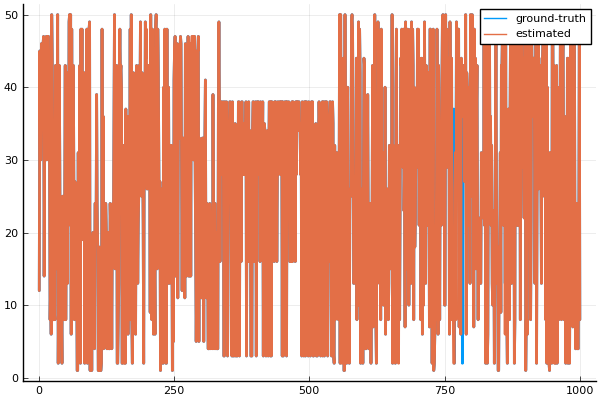

In [16]:
pyplot()
plot(state, line=(2), label="ground-truth")
plot!(state_estimated, line=(2), label="estimated", legend=:topright)

In [17]:
E1 = [[] for i in 1:nstate]
for i in 1:nstate, j in 1:nstate
    push!(E1[i], MDToolbox.Edge(j, T1[i, j]))
end

@time state_estimated_edge = MDToolbox.msmviterbi_edge(observation, nstate, E1, pi_i1, emission1);

  0.842670 seconds (20.50 M allocations: 327.054 MiB, 11.09% gc time)


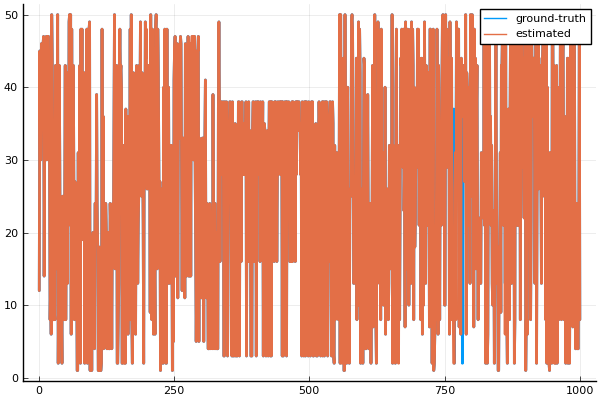

In [18]:
pyplot()
plot(state, line=(2), label="ground-truth")
plot!(state_estimated_edge, line=(2), label="estimated", legend=:topright)

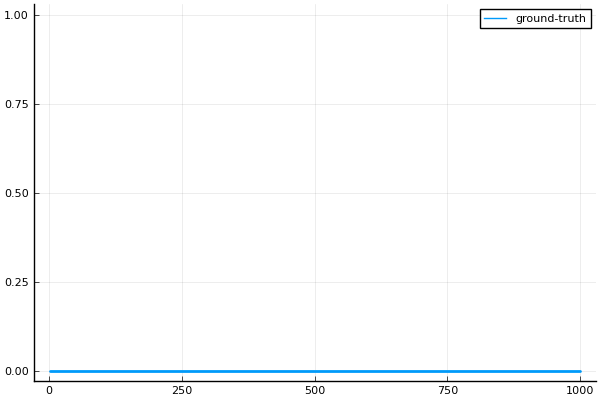

In [19]:
pyplot()
plot(state_estimated_edge .- state_estimated, line=(2), label="ground-truth")